In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset CancerPulmon.csv")
data = np.array(data)
x = data[:,2:6]
y = data[:,6]
n_ejemplos = y.size

In [5]:
def normalizarX(x):
  x_normalizada = []
  promedio = np.mean(x,axis=0)
  x = x.astype(float)
  desviacion_estandar = np.std(x,axis=0)
  for i in range(n_ejemplos):
    caracteristicas_x = []
    for j in range(x.shape[1]):
      if desviacion_estandar[j] != 0:
        caracteristicas_x.append((x[i,j]-promedio[j])/desviacion_estandar[j])
      else:
        caracteristicas_x.append(0)
    x_normalizada.append(caracteristicas_x)
  return x_normalizada, promedio, desviacion_estandar

In [6]:
x_normalizada, promedio, desviacion_estandar = normalizarX(x)
x_normalizada = np.array(x_normalizada)
x = np.concatenate((np.ones((n_ejemplos,1)),x_normalizada),axis=1)

In [7]:
def calcularCosto(x, y, theta):
  J = 0
  hipotesis = np.dot(x,theta)
  J = (1/(2*n_ejemplos))*np.sum(np.square((hipotesis)-y))
  return J

In [8]:
def descensoGradiente(x,y,theta,alpha,n_iteraciones):
  historial_J = []
  theta = theta.copy()
  for i in range(n_iteraciones):
    theta = theta-(alpha/n_ejemplos)*(np.dot(x,theta)-y).dot(x)
    historial_J.append(calcularCosto(x,y,theta))
  return theta, historial_J

In [9]:
def hallarTheta():
  theta = np.zeros(x.shape[1])
  n_iteraciones = 1000
  alpha = 0.003
  theta, historial_J = descensoGradiente(x,y,theta,alpha,n_iteraciones)
  return theta, historial_J

In [10]:
theta, historial_J = hallarTheta()
print("Las thetas encontradas son: ",theta)
print("El menor costo que se pudo determinar fue de: ",historial_J[-1])

Las thetas encontradas son:  [0.45105480815172244 0.2021737936401514 0.028878283459049192
 -0.16506322098633716 0.2032470600572927]
El menor costo que se pudo determinar fue de:  0.017315427716706647


In [11]:
def normalizarXPredecir(x):
  x = np.array(x)
  caracteristicas_x_predecir = []
  for i in range (x.shape[0]):
    if desviacion_estandar[i] != 0:
      caracteristicas_x_predecir.append((x[i]-promedio[i])/desviacion_estandar[i])
    else:
      caracteristicas_x_predecir.append(0)
  return caracteristicas_x_predecir

In [12]:
def predecir(x):
  x = np.array(x)
  x = np.array(x).astype(float)
  x = normalizarXPredecir(x)
  x = np.array(x)
  x = np.concatenate(([1],x),axis=0)
  y_predecir = np.dot(x,theta)
  print("La y predicha para los valores de x es: ",y_predecir)

In [13]:
predecir([35,3,5,4])

La y predicha para los valores de x es:  0.3906720034095501


Text(0, 0.5, 'Costo J')

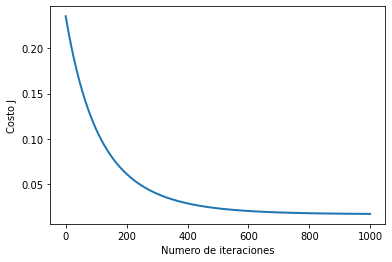

In [14]:
pyplot.plot(np.arange(len(historial_J)), historial_J, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

METODO DE LA NORMAL

In [16]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset CancerPulmon.csv")
data = np.array(data)
x = data[:,2:6]
y = data[:,6]
n_ejemplos = y.size
x = np.concatenate((np.ones((n_ejemplos,1)),x),axis=1)

In [17]:
def metodoNormal(x, y):
  x = np.float64(x)
  y = np.float64(y)
  theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
  return theta

In [18]:
theta = metodoNormal(x, y)
print("Las thetas encontradas son: ",theta)
x_predecir = [1,35,3,5,4]
x_predecir = np.array(x_predecir)
y_predecir = np.dot(x_predecir,theta)
print("La y predicha para los valores de x es: ",y_predecir)

Las thetas encontradas son:  [-0.0809594   0.01277977  0.00216894 -0.06267237  0.0939671 ]
La y predicha para los valores de x es:  0.43534588145885184
